#Collecting Data

Data ini diambil dari kaggle https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

#Preparing Dataset

1. Importing necessary library
2. Filtering dataset (surabaya only)
3. Cleaning unnecessary variable
4. Exploratory data analysis

#Importing necessary library


In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Filtering Dataset (Surabaya Only)

In [3]:
#Importing dataset
place = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/tourism_new.csv", delimiter=';')
rating = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/tourism_rating.csv")
user = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/user.csv", delimiter=';')

In [4]:
#Looking for data place
print(place.head())
place.info()

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

   Price  Rating  Time_Minutes                  Coordinate  \
0      0     4.4          60.0  {'lat': -7.308648199999999   
1  35000     4.4          60.0          {'lat': -7.2952211   
2      0     4.6          45.0          {'lat': -7.2356933   
3  15000     4.4           NaN      

In [5]:
#Looking for data rating
print(rating.head())
rating.info()

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [6]:
#Looking for data user
print(user.head())
user.info()

   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [7]:
#Filtering data
#1. Selecting database rating only for the city of Surabaya
rating = pd.merge(rating, place[['Place_Id']], how ='right', on='Place_Id')

#2. Selecting database users for those who only visit the city of Surabaya
user = pd.merge(user, rating[['User_Id']], how = 'right', on='User_Id').drop_duplicates().sort_values('User_Id')

print(rating.tail())
print(user.tail())

     User_Id  Place_Id  Place_Ratings
832      274       436              4
833      284       436              1
834      290       436              3
835      292       436              2
836      294       436              1
     User_Id                     Location  Age
291      296    Lampung, Sumatera Selatan   31
453      297  Palembang, Sumatera Selatan   39
583      298            Bogor, Jawa Barat   38
198      299          Sragen, Jawa Tengah   27
97       300         Ponorogo, Jawa Timur   26


#Cleaning unnecessary variable

In [8]:

#Removing the "time minutes" column in the place dataset
place = place.drop(['Time_Minutes'], axis=1)

#Changing the data "price" type in place dataset to float
place["Price"] = place["Price"].astype("float")

#Changing the data "rating" type in rating dataset to float 
rating["Place_Ratings"] = rating["Place_Ratings"].astype("float")

In [9]:
print(place.head())
print(place.info())
print(rating.info())

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

     Price  Rating                  Coordinate                   Lat  \
0      0.0     4.4  {'lat': -7.308648199999999   'lng': 112.8216622}   
1  35000.0     4.4          {'lat': -7.2952211   'lng': 112.8035603}   
2      0.0     4.6          {'lat': -7.2356933   'lng': 112.7955234}

In [10]:
#Shape Info for place, user dan rating dataset
print(place.shape)
print(user.shape)
print(rating.shape)

(37, 11)
(277, 3)
(837, 3)


#Explanatory data analysis

In [11]:
#Showing tourist attractions with the highest number of ratings
top_15 = rating['Place_Id'].value_counts().reset_index()[0:15]
top_15 = pd.merge(top_15, place[['Place_Id', 'Place_Name']], how='left', left_on='index', right_on='Place_Id')
print(top_15)

    index  Place_Id_x  Place_Id_y                       Place_Name
0     402          33         402      Food Junction Grand Pakuwon
1     430          32         430           Atlantis Land Surabaya
2     416          31         416                 Keraton Surabaya
3     406          29         406             Kebun Bibit Wonorejo
4     398          28         398              Taman Buah Surabaya
5     427          28         427         Patung Buddha Empat Rupa
6     405          27         405              Surabaya North Quay
7     424          26         424              Pantai Ria Kenjeran
8     407          26         407  Taman Ekspresi Dan Perpustakaan
9     417          26         417          Kelenteng Sanggar Agung
10    434          25         434                    Taman Bungkul
11    423          24         423            Patung Sura dan Buaya
12    428          24         428   Monumen Bambu Runcing Surabaya
13    400          23         400              Hutan Bambu Kep

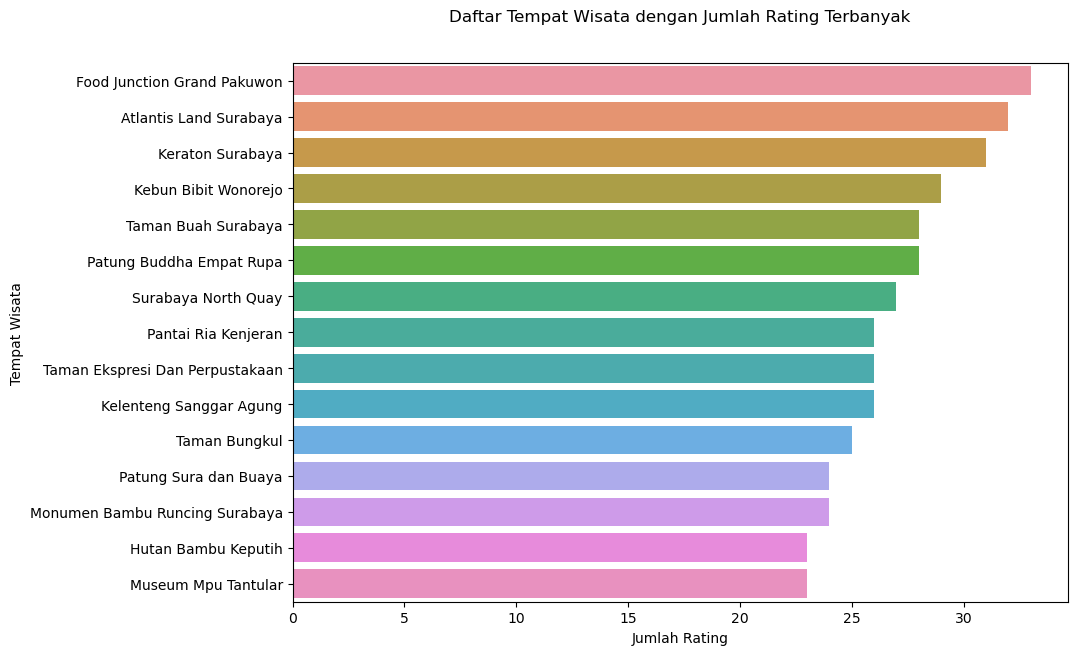

In [12]:
#Displaying the plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_15)
plt.title('Daftar Tempat Wisata dengan Jumlah Rating Terbanyak', pad=30)
plt.xlabel('Jumlah Rating')
plt.ylabel('Tempat Wisata')
plt.show()

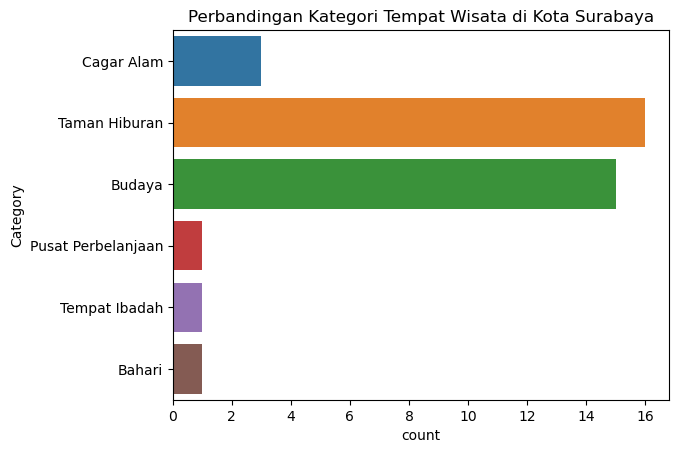

In [13]:
#Displaying the comparison of the destination categories in the Surabaya
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Kategori Tempat Wisata di Kota Surabaya')
plt.show()


# Modelling Content Based Filtering

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [15]:
td = TfidfVectorizer(stop_words='english')
tfidf_matrix = td.fit_transform(place['Description'])
tfidf_matrix.shape

(37, 1380)

In [16]:
#Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.11806254, 0.18330884, ..., 0.15911774, 0.05445854,
        0.23736041],
       [0.11806254, 1.        , 0.10558219, ..., 0.19926387, 0.37699536,
        0.09402296],
       [0.18330884, 0.10558219, 1.        , ..., 0.24934841, 0.08070536,
        0.21838485],
       ...,
       [0.15911774, 0.19926387, 0.24934841, ..., 1.        , 0.15111992,
        0.24053191],
       [0.05445854, 0.37699536, 0.08070536, ..., 0.15111992, 1.        ,
        0.06264978],
       [0.23736041, 0.09402296, 0.21838485, ..., 0.24053191, 0.06264978,
        1.        ]])

In [17]:
#Construct a reverse map of indices and movie title
indicate = pd.Series(place.index, index=place['Place_Name']).drop_duplicates()

In [18]:
#Function that takes in place name as input and outputs most similar destination
def recommendation(Place_name, cosine_sim=cosine_sim):
  idx = indicate[Place_name]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  destination_indicate = [i[0] for i in sim_scores]
  return place['Place_Name'].iloc[destination_indicate]

In [21]:
# Giving destination recomendation from place that input from user
recommendation(input())

Keraton Surabaya


10                   Kenjeran Park
27        Patung Buddha Empat Rupa
25             Pantai Ria Kenjeran
16                  Jembatan Merah
34                   Taman Bungkul
5              Taman Buah Surabaya
36    Taman Flora Bratang Surabaya
11             Surabaya North Quay
2                   Taman Prestasi
0            Taman Harmoni Keputih
Name: Place_Name, dtype: object


# Collaborative Based Filtering


In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
#Filtering data 
min_place_rating = 20
filter_place = (rating["Place_Id"].value_counts()>min_place_rating)
filter_place = filter_place[filter_place].index.tolist()

min_user_rating =3 
filter_user = (rating["User_Id"].value_counts()>min_user_rating)
filter_user = filter_user[filter_user].index.tolist()

filtered_data = rating[(rating["Place_Id"].isin(filter_place)) & (rating["User_Id"]).isin(filter_user)]
print(rating.shape)
print(filtered_data.shape)
print(filtered_data)

(837, 3)
(330, 3)
     User_Id  Place_Id  Place_Ratings
1          6       393            2.0
3         19       393            3.0
8         82       393            5.0
11       131       393            3.0
12       131       393            4.0
..       ...       ...            ...
829      198       436            1.0
830      224       436            1.0
831      248       436            5.0
832      274       436            4.0
833      284       436            1.0

[330 rows x 3 columns]


In [24]:
#Copy filtered data to another dataset
df = filtered_data.copy()
df

,User_Id,Place_Id,Place_Ratings
1,6,393,2.0
3,19,393,3.0
8,82,393,5.0
11,131,393,3.0
12,131,393,4.0
...,...,...,...
829,198,436,1.0
830,224,436,1.0
831,248,436,5.0
832,274,436,4.0


Doing the Encoding Dataset

In [25]:
#Preprocessing to change the User_ID without the same value
user_ids = df['User_Id'].unique().tolist()
print('list User_id: ', user_ids)

#Encoding User_Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id: ', user_to_user_encoded)

#Encoding value to User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded value to User_Id: ', user_encoded_to_user)


list User_id:  [6, 19, 82, 131, 184, 255, 261, 5, 49, 106, 178, 188, 209, 216, 220, 262, 286, 28, 40, 74, 121, 179, 202, 268, 287, 13, 17, 58, 154, 166, 191, 198, 257, 259, 285, 65, 94, 116, 118, 146, 150, 157, 167, 175, 206, 267, 283, 9, 76, 84, 173, 299, 91, 204, 228, 265, 278, 43, 55, 83, 142, 187, 210, 295, 226, 272, 124, 242, 248, 284, 149, 219, 224, 274, 282, 33, 130, 297, 123, 217, 136, 101, 227, 269, 80, 112, 93, 194, 77, 122]
encoded user_id:  {6: 0, 19: 1, 82: 2, 131: 3, 184: 4, 255: 5, 261: 6, 5: 7, 49: 8, 106: 9, 178: 10, 188: 11, 209: 12, 216: 13, 220: 14, 262: 15, 286: 16, 28: 17, 40: 18, 74: 19, 121: 20, 179: 21, 202: 22, 268: 23, 287: 24, 13: 25, 17: 26, 58: 27, 154: 28, 166: 29, 191: 30, 198: 31, 257: 32, 259: 33, 285: 34, 65: 35, 94: 36, 116: 37, 118: 38, 146: 39, 150: 40, 157: 41, 167: 42, 175: 43, 206: 44, 267: 45, 283: 46, 9: 47, 76: 48, 84: 49, 173: 50, 299: 51, 91: 52, 204: 53, 228: 54, 265: 55, 278: 56, 43: 57, 55: 58, 83: 59, 142: 60, 187: 61, 210: 62, 295: 63,

In [26]:
#Changing the "Place_Id" to List without the same value
place_ids = df['Place_Id'].unique().tolist()
print('list place_id: ', place_ids)

#Encoding "Place_Id"
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded place_id: ', place_to_place_encoded)

#Encoding value to "Place_Id"
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded value to place_id: ', place_encoded_to_place )

list place_id:  [393, 395, 397, 398, 400, 402, 405, 406, 407, 410, 414, 416, 417, 421, 422, 423, 424, 426, 427, 428, 429, 430, 431, 433, 434, 436]
encoded place_id:  {393: 0, 395: 1, 397: 2, 398: 3, 400: 4, 402: 5, 405: 6, 406: 7, 407: 8, 410: 9, 414: 10, 416: 11, 417: 12, 421: 13, 422: 14, 423: 15, 424: 16, 426: 17, 427: 18, 428: 19, 429: 20, 430: 21, 431: 22, 433: 23, 434: 24, 436: 25}
encoded value to place_id:  {0: 393, 1: 395, 2: 397, 3: 398, 4: 400, 5: 402, 6: 405, 7: 406, 8: 407, 9: 410, 10: 414, 11: 416, 12: 417, 13: 421, 14: 422, 15: 423, 16: 424, 17: 426, 18: 427, 19: 428, 20: 429, 21: 430, 22: 431, 23: 433, 24: 434, 25: 436}


In [27]:
#Mapping User_Id to dataframe
df['user'] =df['User_Id'].map(user_to_user_encoded)

#Mapping Place_Id to dataframe
df['place']=df['Place_Id'].map(place_to_place_encoded)

In [28]:
num_users = len(user_to_user_encoded)
num_places = len(place_to_place_encoded)
min_rating = min(df['Place_Ratings'])
max_rating = max(df['Place_Ratings'])

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

print(num_users, num_places, min_rating, max_rating)

90 26 1.0 5.0


In [29]:
df=df.sample(frac=1, random_state=42).iloc[:1000,:]
df

,User_Id,Place_Id,Place_Ratings,user,place
34,5,395,2.0,7,1
442,187,417,2.0,61,12
373,224,414,3.0,72,10
122,257,398,1.0,32,3
267,17,406,5.0,26,7
...,...,...,...,...,...
526,136,422,1.0,80,14
182,116,402,5.0,37,5
289,283,406,1.0,46,7
693,121,430,5.0,20,21


In [30]:
#Splitting data train and test
x = df[['user','place']].values
y=df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(264, 2)
(66, 2)
(264,)
(66,)


In [32]:
user_id_input = tf.keras.layers.Input(shape=[1], name="user_id_input")
place_id_input = tf.keras.layers.Input(shape=[1], name="place_id_input")

user_embedding = tf.keras.layers.Embedding(output_dim = 10,
                                           input_dim=num_users+1, 
                                           input_length = 1,
                                           name = "user_embedding")(user_id_input)
place_embedding = tf.keras.layers.Embedding(output_dim = 20,
                                            input_dim = num_places+1,
                                            input_length = 1,
                                           name = "place_embedding")(place_id_input)

user_vec = tf.keras.layers.Flatten(name ="flatten-user")(user_embedding)
place_vec = tf.keras.layers.Flatten(name ="flatten-place")(place_embedding)

In [33]:
#Model
concat = tf.keras.layers.Concatenate()([user_vec, place_vec])

fc1 = tf.keras.layers.Dense(128, activation='relu')(concat)
fc2 = tf.keras.layers.Dense(128, activation='relu')(fc1)
fc3 = tf.keras.layers.Dense(128, activation='relu')(fc2)
y = tf.keras.layers.Dense(1)(fc3)

model = tf.keras.models.Model(inputs=[user_id_input, place_id_input], outputs=y)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum = 0.9),
              loss = "mse",
              metrics =[tf.keras.metrics.RootMeanSquaredError()]
)
              #metrics = [tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(x = [x_train[:,0], x_train[:,1]], 
                    y = y_train,
                    validation_data =([x_test[:,0], x_test[:,1]], y_test),
                    epochs = 100,
                    verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 72ms/step - loss: 0.3525 - root_mean_squared_error: 0.5937 - val_loss: 0.3684 - val_root_mean_squared_error: 0.6069
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3439 - root_mean_squared_error: 0.5864 - val_loss: 0.3573 - val_root_mean_squared_error: 0.5977
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3322 - root_mean_squared_error: 0.5763 - val_loss: 0.3449 - val_root_mean_squared_error: 0.5873
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3193 - root_mean_squared_error: 0.5651 - val_loss: 0.3329 - val_root_mean_squared_error: 0.5770
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3070 - root_mean_squared_error: 0.5541 - val_loss: 0.3211 - val_root_mean_squared_error: 0.5667
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.2950 - root_mean_squared_error: 0.5431 - val_loss: 0.3096 - val_root_mean_sq

In [34]:
 import tensorflow as tf
 from sklearn.metrics import mean_squared_error

<function matplotlib.pyplot.show(close=None, block=None)>

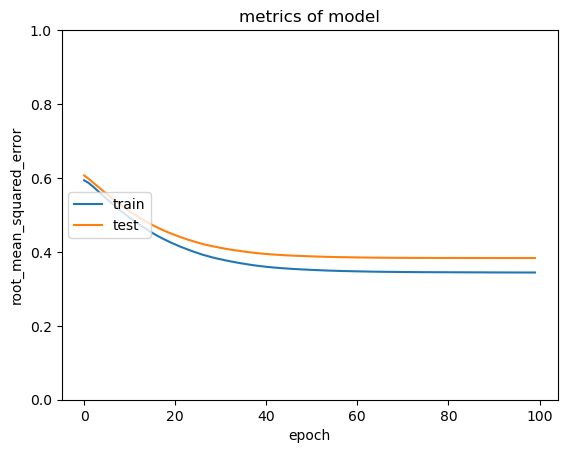

In [35]:
#showing the plot of residual
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('metrics of model')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1)
plt.legend(['train','test'], loc='center left')
plt.show

In [36]:
place_df = place[['Place_Id', 'Place_Name','Category', 'Rating', 'Price']]
place_df.columns = ['id','place_name','category','rating','price']
df=filtered_data.copy()

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
ratings= model.predict([user_place_array[:,0], user_place_array[:,1]]).flatten()

1/1 [==============================] - 0s 315ms/step


In [37]:
top_ratings_indices = ratings.argsort()[-11:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
recommended_place_ids = list(recommended_place_ids)
print(recommended_place_ids)

[434, 400, 423, 405, 402, 406, 414, 431, 433, 395, 436]


In [38]:
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,11)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

Daftar rekomendasi untuk: User 33

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Keraton Surabaya : Budaya
House of Sampoerna : Budaya

------------------------------------------------------------
Top 10 place recommendation
------------------------------------------------------------
1 . Taman Prestasi 
     Taman Hiburan , Harga Tiket Masuk  0.0 , Rating Wisata  4.6 

2 . Hutan Bambu Keputih 
     Cagar Alam , Harga Tiket Masuk  0.0 , Rating Wisata  4.3 

3 . Food Junction Grand Pakuwon 
     Pusat Perbelanjaan , Harga Tiket Masuk  0.0 , Rating Wisata  4.5 

4 . Surabaya North Quay 
     Taman Hiburan , Harga Tiket Masuk  50000.0 , Rating Wisata  4.4 

5 . Kebun Bibit Wonorejo 
     Cagar Alam , Harga Tiket Masuk  0.0 , Rating Wisata  4.4 

6 . Jembatan Merah 
     Budaya , Harga Tiket Masuk  0.0 , Rating Wisata  4.5 

7 . Patung Sura dan Buaya 
     Budaya 